In [182]:

import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn import neighbors,  ensemble
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import preprocessing, model_selection
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer




In [183]:
df = pd.read_csv(r'C:\Users\shiva\OneDrive\Desktop\marketing_campaign excel.csv')

In [184]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [185]:
del df['ID']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\shiva\AppData\Local\Temp\ipykernel_21196\3270116335.py:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\shiva\AppData\Local\Temp\ipykernel_21196\3270116335.py:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\shiva\AppData\Local\Temp\ipykernel_21196\3270116335.py:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\shiva\AppData\Local\Temp\ipykernel_21196\3270116335.py:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_date

In [186]:
t_dt = '2014-12-06'
t_dt = pd.to_datetime(t_dt)
print(type(t_dt))
df['No_of_days_from_enrol'] = t_dt - df['Dt_Customer']
df

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,No_of_days_from_enrol
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,0,3,11,1,971 days
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,3,11,0,125 days
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,472 days
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,3,11,0,65 days
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,321 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,3,11,0,541 days
2236,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,...,0,0,0,1,0,0,3,11,0,61 days
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,3,11,0,315 days
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,3,11,0,316 days


In [187]:
df['Days_from_enrol'] = df['No_of_days_from_enrol'].dt.days
del df['No_of_days_from_enrol']
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_from_enrol
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,0,3,11,1,971
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,3,11,0,125
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,472
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,3,11,0,65
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,3,11,0,541
2236,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,...,0,0,0,1,0,0,3,11,0,61
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,3,11,0,315
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,3,11,0,316


In [188]:
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
del  df['Year_Birth']

In [189]:
def funchildk(p):
    if p > 0:
        return 1
    else:
        return 0
    
def funchildt(p):
    if p > 0:
        return 2
    else :
        return 0
    
def funchild(p):
    if p > 2:
        return 'Both'
    elif p == 0:
        return 'No Child'
    elif p== 1:
        return 'Kid'
    elif p == 2:
        return 'Teen'

df['total_mnt'] = df['MntWines'] + df['MntFishProducts'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['total_purchaces'] = df['NumDealsPurchases'] + df['NumCatalogPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']
df['AverageSpent'] = round(df['total_mnt'] / df['total_purchaces'], 2)
df['childk'] = df.Kidhome.apply(funchildk)
df['childt'] = df.Teenhome.apply(funchildt)
df['child_c'] = df.childk + df.childt
df['child_c'] = df.child_c.apply(funchild)
df['t_child'] = df.Kidhome +  df.Teenhome

df.drop('childk', axis = 1, inplace = True)
df.drop('childt', axis = 1, inplace = True)

df['AverageSpent']=df['AverageSpent'].round(decimals=0)


df.replace([np.inf, -np.inf], np.nan, inplace=True)


df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Days_from_enrol,Age,total_mnt,total_purchaces,AverageSpent,child_c,t_child
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,3,11,1,971,55,1529,32,48.0,No Child,0
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,3,11,0,125,60,26,11,2.0,Both,2
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,3,11,0,472,48,727,25,29.0,No Child,0
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,3,11,0,65,30,49,14,4.0,Kid,1
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,3,11,0,321,33,379,24,16.0,Kid,1


In [190]:
df['AverageSpent'].describe()

count    2238.000000
mean       25.703753
std        42.762553
min         0.000000
25%         5.000000
50%        17.000000
75%        38.000000
max      1677.000000
Name: AverageSpent, dtype: float64

In [191]:
upper_limit = df['AverageSpent'].mean() + 3*df['AverageSpent'].std()
lower_limit = df['AverageSpent'].mean() - 3*df['AverageSpent'].std()
upper_limit, lower_limit

(153.99141223759761, -102.58390553518474)

In [192]:
df['AverageSpent'] = np.where(df['AverageSpent']>upper_limit,upper_limit,np.where(df['AverageSpent']<lower_limit,lower_limit,df['AverageSpent'] ))

In [193]:
df.Education.value_counts(), df.Marital_Status.value_counts(), df.Z_Revenue.value_counts()

(Graduation    1127
 PhD            486
 Master         370
 2n Cycle       203
 Basic           54
 Name: Education, dtype: int64,
 Married     864
 Together    580
 Single      480
 Divorced    232
 Widow        77
 Alone         3
 Absurd        2
 YOLO          2
 Name: Marital_Status, dtype: int64,
 11    2240
 Name: Z_Revenue, dtype: int64)

In [194]:
df.Education = df['Education'].replace({"PhD" : "Postgraduate", 
                                        "Master" : "Postgraduate", "2n Cycle" : "Postgraduate", 
                                        "Basic" : "Undergraduate", "Graduation" : "Graduate"})

df.Marital_Status = df.Marital_Status.replace({'Married' : 'Relationship', 
                                               'Together' : 'Relationship', 'Single' : 'Single', 
                                               'Widow' : 'Single', 'Divorced' : 'Single', 'Alone' : 'Single', 
                                               'Absurd' : 'Single', 'YOLO' : 'Single'})

df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Days_from_enrol,Age,total_mnt,total_purchaces,AverageSpent,child_c,t_child
0,Graduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,3,11,1,971,55,1529,32,48.0,No Child,0
1,Graduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,3,11,0,125,60,26,11,2.0,Both,2
2,Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,49,127,...,3,11,0,472,48,727,25,29.0,No Child,0
3,Graduate,Relationship,26646.0,1,0,2014-10-02,26,11,4,20,...,3,11,0,65,30,49,14,4.0,Kid,1
4,Postgraduate,Relationship,58293.0,1,0,2014-01-19,94,173,43,118,...,3,11,0,321,33,379,24,16.0,Kid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,61223.0,0,1,2013-06-13,46,709,43,182,...,3,11,0,541,46,1298,23,56.0,Teen,1
2236,Postgraduate,Relationship,64014.0,2,1,2014-10-06,56,406,0,30,...,3,11,0,61,68,444,29,15.0,Both,3
2237,Graduate,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,3,11,0,315,33,1193,25,48.0,No Child,0
2238,Postgraduate,Relationship,69245.0,0,1,2014-01-24,8,428,30,214,...,3,11,0,316,58,813,26,31.0,Teen,1


In [195]:
df["Family_Size"] = 0
for i in range(len(df)) :
    if df['Family_Size'][i] == 'Relationship' :
        df['Family_Size'][i] = 2 + df['t_child'][i]
    else:
        df['Family_Size'][i] = 1 + df['t_child'][i]
    

df

C:\Users\shiva\AppData\Local\Temp\ipykernel_21196\3358712655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_Size'][i] = 1 + df['t_child'][i]


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Days_from_enrol,Age,total_mnt,total_purchaces,AverageSpent,child_c,t_child,Family_Size
0,Graduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,11,1,971,55,1529,32,48.0,No Child,0,1
1,Graduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,11,0,125,60,26,11,2.0,Both,2,3
2,Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,49,127,...,11,0,472,48,727,25,29.0,No Child,0,1
3,Graduate,Relationship,26646.0,1,0,2014-10-02,26,11,4,20,...,11,0,65,30,49,14,4.0,Kid,1,2
4,Postgraduate,Relationship,58293.0,1,0,2014-01-19,94,173,43,118,...,11,0,321,33,379,24,16.0,Kid,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,61223.0,0,1,2013-06-13,46,709,43,182,...,11,0,541,46,1298,23,56.0,Teen,1,2
2236,Postgraduate,Relationship,64014.0,2,1,2014-10-06,56,406,0,30,...,11,0,61,68,444,29,15.0,Both,3,4
2237,Graduate,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,11,0,315,33,1193,25,48.0,No Child,0,1
2238,Postgraduate,Relationship,69245.0,0,1,2014-01-24,8,428,30,214,...,11,0,316,58,813,26,31.0,Teen,1,2


In [196]:
df.isnull().sum(), df.dtypes


(Education               0
 Marital_Status          0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 Days_from_enrol         0
 Age                     0
 total_mnt               0
 total_purchaces         0
 AverageSpent            2
 child_c                 0
 t_child                 0
 Family_Size             0
 dtype: int64,
 Education                      object
 

In [197]:
df.AverageSpent.fillna(round(df.AverageSpent.mean(), 2), inplace=True)
df.Income.fillna(df.Income.mean(), inplace=True)
df.iloc[655:, :]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Days_from_enrol,Age,total_mnt,total_purchaces,AverageSpent,child_c,t_child,Family_Size
655,Graduate,Single,153924.0,0,0,2014-07-02,81,1,1,1,...,11,0,157,39,5,0,25.02,No Child,0,1
656,Graduate,Relationship,61278.0,0,1,2014-04-01,87,111,3,28,...,11,0,249,61,162,16,10.00,Teen,1,2
657,Postgraduate,Relationship,26490.0,0,0,2012-09-22,92,45,47,52,...,11,0,805,54,163,17,10.00,No Child,0,1
658,Postgraduate,Relationship,73059.0,0,1,2013-08-31,36,410,112,420,...,11,0,462,66,983,30,33.00,Teen,1,2
659,Postgraduate,Single,46734.0,1,2,2013-10-21,86,100,1,39,...,11,0,411,47,222,18,12.00,Both,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,61223.0,0,1,2013-06-13,46,709,43,182,...,11,0,541,46,1298,23,56.00,Teen,1,2
2236,Postgraduate,Relationship,64014.0,2,1,2014-10-06,56,406,0,30,...,11,0,61,68,444,29,15.00,Both,3,4
2237,Graduate,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,11,0,315,33,1193,25,48.00,No Child,0,1
2238,Postgraduate,Relationship,69245.0,0,1,2014-01-24,8,428,30,214,...,11,0,316,58,813,26,31.00,Teen,1,2


In [198]:

# temp = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].max(axis=1)
# for i in range(len(df['MntWines'])):
#     if temp[i] == df['MntWines'][i]:
#         df['Mnt_c'] = 'MntWines'
#     elif temp[i] == df['MntFruits'][i]:
#         df['Mnt_c'] = 'MntFruits'
#     elif temp[i] == df['MntMeatProducts'][i]:
#         df['Mnt_c'] = 'MntMeatProducts'
#     elif temp[i] == df['MntFishProducts'][i]:
#         df['Mnt_c'] = 'MntFishProducts'
#     elif temp[i] == df['MntSweetProducts'][i]:
#         df['Mnt_c'] = 'MntSweetProducts'
#     elif temp[i] == df['MntGoldProds'][i]:
#         df['Mnt_c'] = 'MntGoldProds'
    
# df['Mnt_c'].value_counts()



# def funcamp1(s):
#     if s != 0:
#         return 'one'
    
# def funcamp2(s):
#     if s != 0:
#         return 'two'

# def funcamp3(s):
#     if s != 0:
#         return 'three'
    
# def funcamp1(s):
#     if s != 0:
#         return 'four'
    
# def funcamp1(s):
#     if s != 0:
#         return 'five'

df['camp_c'] = 0
    
for i in range(len(df['AcceptedCmp1'])):
    if  df['AcceptedCmp1'][i] > 0:
        df['camp_c'][i] = 1
    elif df['AcceptedCmp2'][i] > 0:
        df['camp_c'][i] = 2
    elif df['AcceptedCmp3'][i] > 0:
        df['camp_c'][i] = 3
    elif df['AcceptedCmp4'][i] > 0:
        df['camp_c'][i] = 4
    elif df['AcceptedCmp5'][i] > 0:
        df['camp_c'][i] = 5
    elif df['Response'][i] > 0:
        df['camp_c'][i] = 6
        
df


C:\Users\shiva\AppData\Local\Temp\ipykernel_21196\654908783.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['camp_c'][i] = 6
C:\Users\shiva\AppData\Local\Temp\ipykernel_21196\654908783.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['camp_c'][i] = 3
C:\Users\shiva\AppData\Local\Temp\ipykernel_21196\654908783.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['camp_c'][i] = 1
C:\Users\shiva\AppData\Local\Temp\ipyker

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Days_from_enrol,Age,total_mnt,total_purchaces,AverageSpent,child_c,t_child,Family_Size,camp_c
0,Graduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,1,971,55,1529,32,48.0,No Child,0,1,6
1,Graduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,125,60,26,11,2.0,Both,2,3,0
2,Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,49,127,...,0,472,48,727,25,29.0,No Child,0,1,0
3,Graduate,Relationship,26646.0,1,0,2014-10-02,26,11,4,20,...,0,65,30,49,14,4.0,Kid,1,2,0
4,Postgraduate,Relationship,58293.0,1,0,2014-01-19,94,173,43,118,...,0,321,33,379,24,16.0,Kid,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,61223.0,0,1,2013-06-13,46,709,43,182,...,0,541,46,1298,23,56.0,Teen,1,2,0
2236,Postgraduate,Relationship,64014.0,2,1,2014-10-06,56,406,0,30,...,0,61,68,444,29,15.0,Both,3,4,1
2237,Graduate,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,0,315,33,1193,25,48.0,No Child,0,1,4
2238,Postgraduate,Relationship,69245.0,0,1,2014-01-24,8,428,30,214,...,0,316,58,813,26,31.0,Teen,1,2,0


In [199]:
scaler = RobustScaler()
df_1 =df.copy()
df_1.drop(['Education','Marital_Status', 'Dt_Customer','AverageSpent', 'child_c'], axis=1, inplace=True)

scaled_df = scaler.fit_transform(df_1)
col = df_1.columns
df_1 = pd.DataFrame(scaled_df, columns=col)
df_1['Education'], df_1['Marital_Status'], df_1['Dt_Customer'], df_1['child_c'], df_1['AverageSpent'] = df['Education'], df['Marital_Status'], df['Dt_Customer'], df['child_c'], df['AverageSpent']

df_1

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,total_mnt,total_purchaces,t_child,Family_Size,camp_c,Education,Marital_Status,Dt_Customer,child_c,AverageSpent
0,0.195307,0.0,0.0,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.361702,...,1.257625,1.181818,-1.0,-1.0,6.0,Graduate,Single,2012-04-09,No Child,48.0
1,-0.164804,1.0,1.0,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,...,-0.379630,-0.727273,1.0,1.0,0.0,Graduate,Single,2014-08-03,Both,2.0
2,0.606745,0.0,0.0,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.382979,...,0.383987,0.545455,-1.0,-1.0,0.0,Graduate,Relationship,2013-08-21,No Child,29.0
3,-0.766251,1.0,0.0,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.404255,...,-0.354575,-0.454545,0.0,0.0,0.0,Graduate,Relationship,2014-10-02,Kid,4.0
4,0.200040,1.0,0.0,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,-0.191489,...,0.004902,0.454545,0.0,0.0,0.0,Postgraduate,Relationship,2014-01-19,Kid,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.289503,0.0,1.0,-0.06,1.114464,1.09375,0.532407,0.638298,3.43750,4.744681,...,1.005991,0.363636,0.0,0.0,0.0,Graduate,Relationship,2013-06-13,Teen,56.0
2236,0.374721,2.0,1.0,0.14,0.483871,-0.25000,-0.171296,-0.255319,-0.25000,-0.340426,...,0.075708,0.909091,2.0,2.0,1.0,Postgraduate,Relationship,2014-10-06,Both,15.0
2237,0.159980,0.0,0.0,0.84,1.528616,1.25000,0.694444,0.425532,0.12500,0.000000,...,0.891612,0.545455,-1.0,-1.0,4.0,Graduate,Single,2014-01-25,No Child,48.0
2238,0.534442,0.0,1.0,-0.82,0.529657,0.68750,0.680556,1.446809,0.68750,0.787234,...,0.477669,0.636364,0.0,0.0,0.0,Postgraduate,Relationship,2014-01-24,Teen,31.0


Relative Plot Of Some Selected Features: A Data Subset


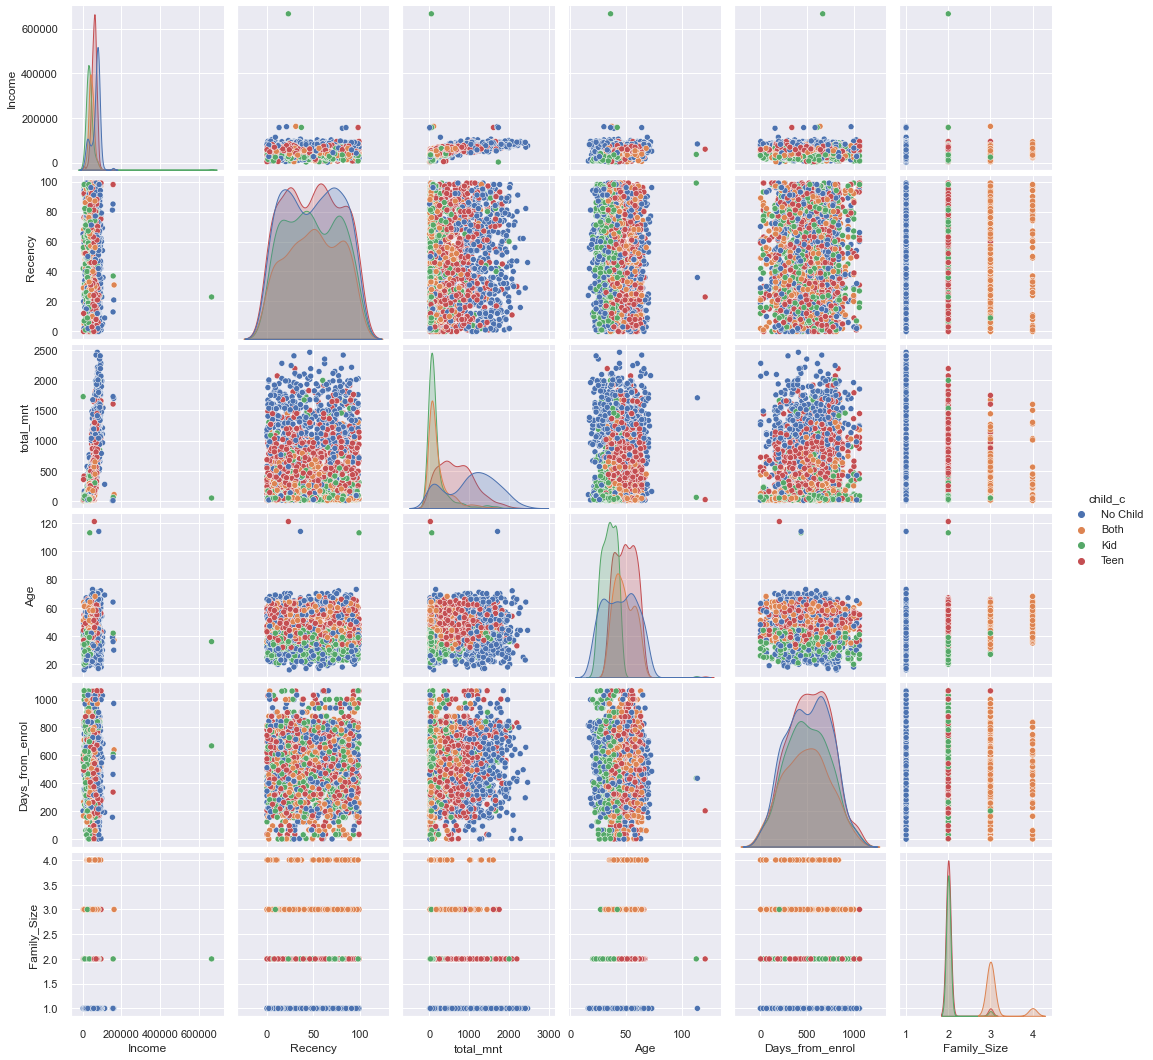

In [200]:
#To plot some selected features 
#Setting up colors prefrences
# sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
# pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
# cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "total_mnt", "Age", "Days_from_enrol", "Family_Size","child_c"]
print("Relative Plot Of Some Selected Features: A Data Subset")
# plt.figure()
sns.pairplot(df[To_Plot],hue='child_c')
#Taking hue 
plt.show()


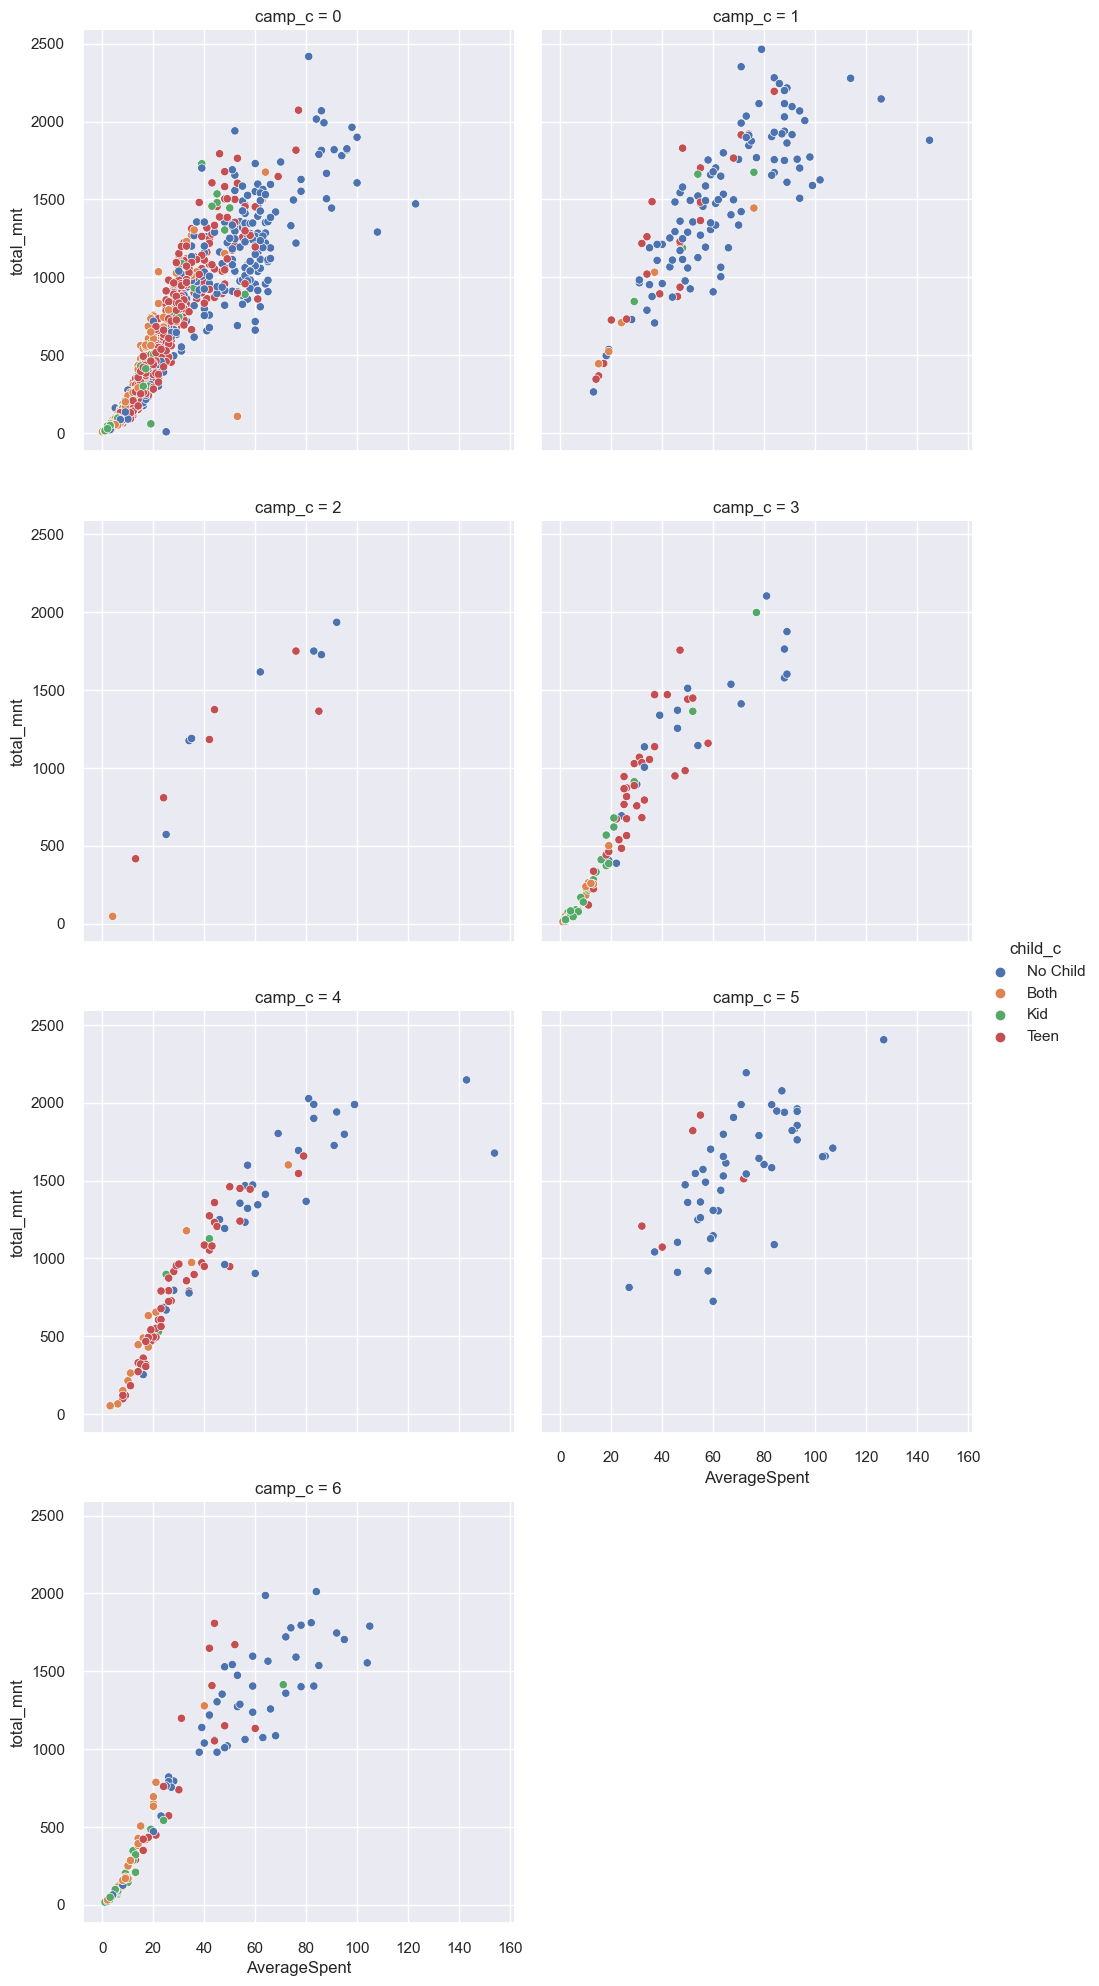

In [201]:
p=sns.relplot(x='AverageSpent', y='total_mnt', data=df, kind='scatter', col='camp_c', col_wrap=2, hue='child_c')
#plt.figure(figsize=(15,8))
p.fig.set_dpi(100)
plt.show()

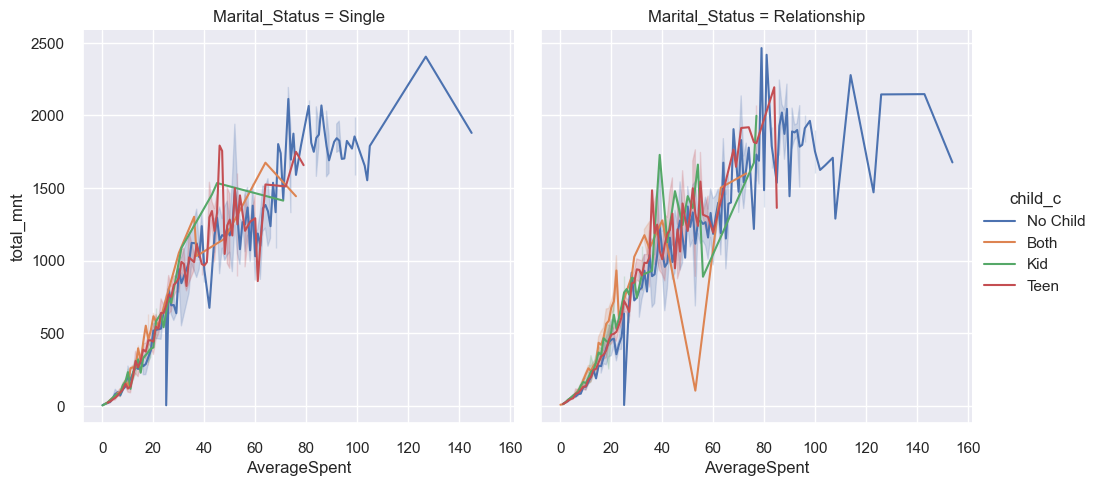

In [202]:
p=sns.relplot(x='AverageSpent', y='total_mnt', data=df, kind='line', col='Marital_Status', col_wrap=2, hue='child_c')
#plt.figure(figsize=(15,8))
p.fig.set_dpi(100)
plt.show()


In [203]:
df_1.dtypes

Income                        float64
Kidhome                       float64
Teenhome                      float64
Recency                       float64
MntWines                      float64
MntFruits                     float64
MntMeatProducts               float64
MntFishProducts               float64
MntSweetProducts              float64
MntGoldProds                  float64
NumDealsPurchases             float64
NumWebPurchases               float64
NumCatalogPurchases           float64
NumStorePurchases             float64
NumWebVisitsMonth             float64
AcceptedCmp3                  float64
AcceptedCmp4                  float64
AcceptedCmp5                  float64
AcceptedCmp1                  float64
AcceptedCmp2                  float64
Complain                      float64
Z_CostContact                 float64
Z_Revenue                     float64
Response                      float64
Days_from_enrol               float64
Age                           float64
total_mnt   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.4% of the points

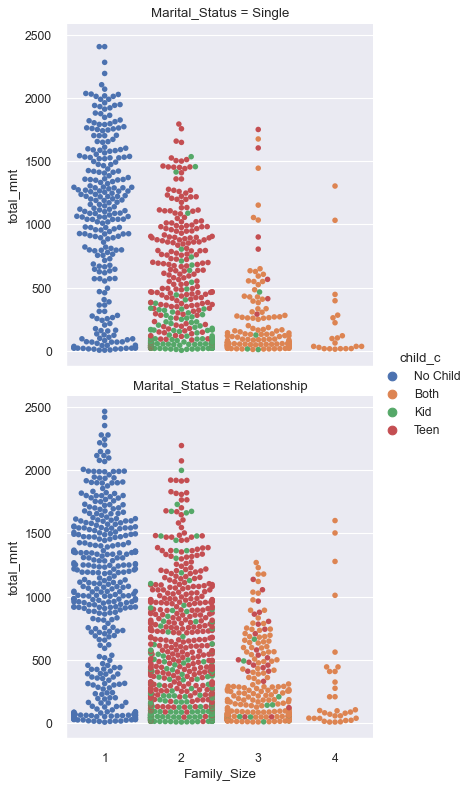

In [204]:


p=sns.catplot(x='Family_Size', y='total_mnt', data=df, kind='swarm', 
                       col='Marital_Status', col_wrap=1, hue='child_c')

p.fig.set_dpi(80)
#plt.figure(figsize=(1,1))

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'aspect'
  cset = contour_func(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


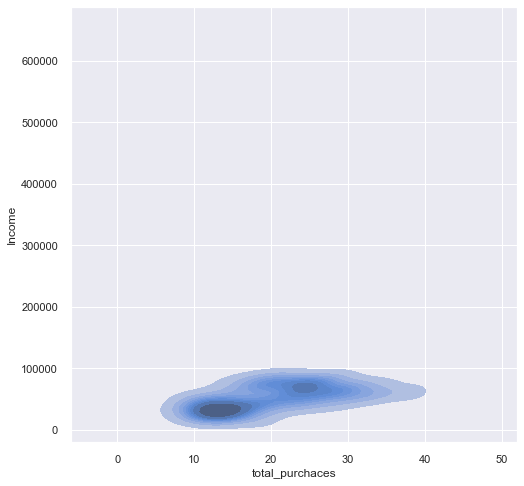

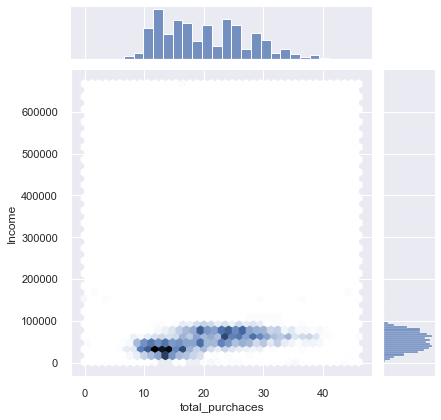

In [205]:
sns.kdeplot(df['total_purchaces'], df['Income'], shade=True, aspect=5/30)
# sns.heatmap(df['total_purchaces'], df['Income'], annot=True, fmt="d", aspect=5/30)

sns.jointplot(df['total_purchaces'], df['Income'], kind='hex')

In [206]:

rf_best  = ensemble.RandomForestClassifier() 

gb_best  = ensemble.GradientBoostingClassifier()

knn_best = neighbors.KNeighborsClassifier()


In [207]:
votingC = ensemble.VotingClassifier(estimators=[( 'rf', rf_best),
                                                ('gb', gb_best),  
                                                ('knn', knn_best)], voting='soft')    

In [208]:
x_df = df_1.copy()

x1_df = pd.get_dummies(x_df.Education, prefix="Edu")
x2_df = pd.get_dummies(x_df.Marital_Status, prefix="Status")
x3_df = pd.get_dummies(x_df.child_c, prefix="No._of")

del x_df['Education'], x_df['Marital_Status'], x_df['child_c'], x_df['Dt_Customer'], x_df['AverageSpent']
x_df = pd.concat([x_df, x1_df, x2_df, x3_df], axis=1)

x_df





,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,camp_c,Edu_Graduate,Edu_Postgraduate,Edu_Undergraduate,Status_Relationship,Status_Single,No._of_Both,No._of_Kid,No._of_No Child,No._of_Teen
0,0.195307,0.0,0.0,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.361702,...,6.0,1,0,0,0,1,0,0,1,0
1,-0.164804,1.0,1.0,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,...,0.0,1,0,0,0,1,1,0,0,0
2,0.606745,0.0,0.0,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.382979,...,0.0,1,0,0,1,0,0,0,1,0
3,-0.766251,1.0,0.0,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.404255,...,0.0,1,0,0,1,0,0,1,0,0
4,0.200040,1.0,0.0,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,-0.191489,...,0.0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.289503,0.0,1.0,-0.06,1.114464,1.09375,0.532407,0.638298,3.43750,4.744681,...,0.0,1,0,0,1,0,0,0,0,1
2236,0.374721,2.0,1.0,0.14,0.483871,-0.25000,-0.171296,-0.255319,-0.25000,-0.340426,...,1.0,0,1,0,1,0,1,0,0,0
2237,0.159980,0.0,0.0,0.84,1.528616,1.25000,0.694444,0.425532,0.12500,0.000000,...,4.0,1,0,0,0,1,0,0,1,0
2238,0.534442,0.0,1.0,-0.82,0.529657,0.68750,0.680556,1.446809,0.68750,0.787234,...,0.0,0,1,0,1,0,0,0,0,1


In [209]:
y_df = x_df['camp_c']
x_df.drop(['camp_c'], axis=1, inplace=True)

In [210]:
x_df.isnull().sum(), x_df.shape

(Income                 0
 Kidhome                0
 Teenhome               0
 Recency                0
 MntWines               0
 MntFruits              0
 MntMeatProducts        0
 MntFishProducts        0
 MntSweetProducts       0
 MntGoldProds           0
 NumDealsPurchases      0
 NumWebPurchases        0
 NumCatalogPurchases    0
 NumStorePurchases      0
 NumWebVisitsMonth      0
 AcceptedCmp3           0
 AcceptedCmp4           0
 AcceptedCmp5           0
 AcceptedCmp1           0
 AcceptedCmp2           0
 Complain               0
 Z_CostContact          0
 Z_Revenue              0
 Response               0
 Days_from_enrol        0
 Age                    0
 total_mnt              0
 total_purchaces        0
 t_child                0
 Family_Size            0
 Edu_Graduate           0
 Edu_Postgraduate       0
 Edu_Undergraduate      0
 Status_Relationship    0
 Status_Single          0
 No._of_Both            0
 No._of_Kid             0
 No._of_No Child        0
 No._of_Teen

In [211]:
x_train , x_test, y_train,y_test =model_selection.train_test_split(x_df,
                                                                   y_df, train_size=0.75)

votinC = votingC.fit(x_train, y_train)

pred = votingC.predict(x_test)
print(accuracy_score(y_test, pred))

0.9982142857142857


In [212]:
x_df['AverageSpent'] = df['AverageSpent']
x_df.AverageSpent.astype(float)
for i in range(len(x_df['AverageSpent'])):
    if x_df['AverageSpent'][i] > 10000:
        x_df['AverageSpent'][i] = 1000.0
x_df.AverageSpent.astype(int)  

0       48
1        2
2       29
3        4
4       16
        ..
2235    56
2236    15
2237    48
2238    31
2239     9
Name: AverageSpent, Length: 2240, dtype: int32

In [213]:


sc_km= []
r_k = range(3,20)

for i in r_k:
    kmeans = KMeans(n_clusters = i, n_init = 100)
    kmeans.fit(x_df)
    
    
    clusters = kmeans.fit_predict(x_df)
    sc_km.append(silhouette_score(x_df, clusters ))
    


In [214]:
sc_km

[0.5688423905173142,
 0.5702914197699408,
 0.5199741532753103,
 0.4890308213618709,
 0.49127303974247616,
 0.4816041092543932,
 0.40909680053183844,
 0.3907100849916965,
 0.35053430942198105,
 0.3413410805631442,
 0.337568183048661,
 0.2891784372984327,
 0.28505217584540704,
 0.23836268524062396,
 0.21295579180397126,
 0.20991094175927447,
 0.1997054835419917]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


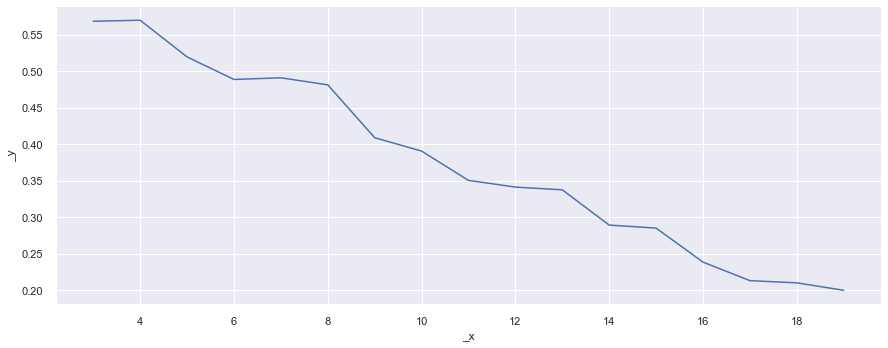

In [215]:
 sns.relplot(r_k, sc_km, kind='line', aspect=50/20)

# plt.plot(r_k, sc_km)
plt.show()

In [216]:
pca = PCA(n_components=3)
pca.fit(x_df)
PCA_df = pd.DataFrame(pca.transform(x_df), columns=(["col1","col2", "col3"]))
PCA_df

,col1,col2,col3
0,23.308283,-3.079987,-0.135846
1,-23.160895,0.756832,-0.003492
2,4.115069,-1.281752,-1.022579
3,-21.136420,0.441491,-1.200089
4,-9.013903,-0.806529,0.286701
...,...,...,...
2235,31.110794,-1.503733,1.514486
2236,-10.185400,1.024412,3.633883
2237,23.007634,1.163395,-0.832701
2238,6.067582,-0.615456,0.677554


In [217]:


sc_km= []
r_k = range(3,20)

for i in r_k:
    kmeans = KMeans(n_clusters = i, n_init = 100)
    kmeans.fit(PCA_df)
    
    
    clusters = kmeans.fit_predict(PCA_df)
    sc_km.append(silhouette_score(PCA_df, clusters ))
    
sc_km

[0.6029365317660256,
 0.6168025447809671,
 0.5874606939363568,
 0.5685685175195024,
 0.5756683913047752,
 0.5693291315830763,
 0.5231711563425687,
 0.508965836189029,
 0.48100606850800764,
 0.48732389528227477,
 0.47474889575446977,
 0.4441129272593736,
 0.44543064856068215,
 0.3954197426626509,
 0.38408142081945007,
 0.38148049968764763,
 0.3763574185023173]

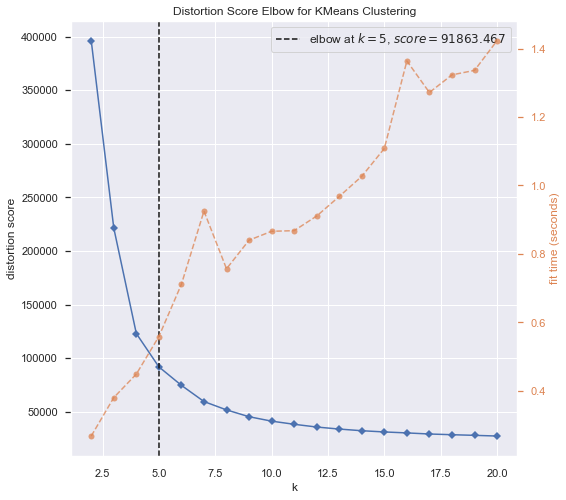

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [218]:
elbow_vis = KElbowVisualizer(KMeans(n_init = 100), k=20)
elbow_vis.fit(x_df)
plt.rcParams["figure.figsize"] = (8,8)

elbow_vis.show()




In [219]:
kmeans = KMeans(n_clusters = 5, n_init = 100)
yp_km = kmeans.fit_predict(x_df)


In [220]:
x_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Edu_Graduate,Edu_Postgraduate,Edu_Undergraduate,Status_Relationship,Status_Single,No._of_Both,No._of_Kid,No._of_No Child,No._of_Teen,AverageSpent
0,0.195307,0.0,0.0,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.361702,...,1,0,0,0,1,0,0,1,0,48.0
1,-0.164804,1.0,1.0,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,...,1,0,0,0,1,1,0,0,0,2.0
2,0.606745,0.0,0.0,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.382979,...,1,0,0,1,0,0,0,1,0,29.0
3,-0.766251,1.0,0.0,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.404255,...,1,0,0,1,0,0,1,0,0,4.0
4,0.200040,1.0,0.0,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,-0.191489,...,0,1,0,1,0,0,1,0,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.289503,0.0,1.0,-0.06,1.114464,1.09375,0.532407,0.638298,3.43750,4.744681,...,1,0,0,1,0,0,0,0,1,56.0
2236,0.374721,2.0,1.0,0.14,0.483871,-0.25000,-0.171296,-0.255319,-0.25000,-0.340426,...,0,1,0,1,0,1,0,0,0,15.0
2237,0.159980,0.0,0.0,0.84,1.528616,1.25000,0.694444,0.425532,0.12500,0.000000,...,1,0,0,0,1,0,0,1,0,48.0
2238,0.534442,0.0,1.0,-0.82,0.529657,0.68750,0.680556,1.446809,0.68750,0.787234,...,0,1,0,1,0,0,0,0,1,31.0


In [221]:
x_df['Education'], x_df['Marital_Status'], x_df['child_c'] =  df_1['Education'], df_1['Marital_Status'], df_1['child_c']
x_df.dtypes, yp_km

(Income                 float64
 Kidhome                float64
 Teenhome               float64
 Recency                float64
 MntWines               float64
 MntFruits              float64
 MntMeatProducts        float64
 MntFishProducts        float64
 MntSweetProducts       float64
 MntGoldProds           float64
 NumDealsPurchases      float64
 NumWebPurchases        float64
 NumCatalogPurchases    float64
 NumStorePurchases      float64
 NumWebVisitsMonth      float64
 AcceptedCmp3           float64
 AcceptedCmp4           float64
 AcceptedCmp5           float64
 AcceptedCmp1           float64
 AcceptedCmp2           float64
 Complain               float64
 Z_CostContact          float64
 Z_Revenue              float64
 Response               float64
 Days_from_enrol        float64
 Age                    float64
 total_mnt              float64
 total_purchaces        float64
 t_child                float64
 Family_Size            float64
 Edu_Graduate             uint8
 Edu_Pos

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points c

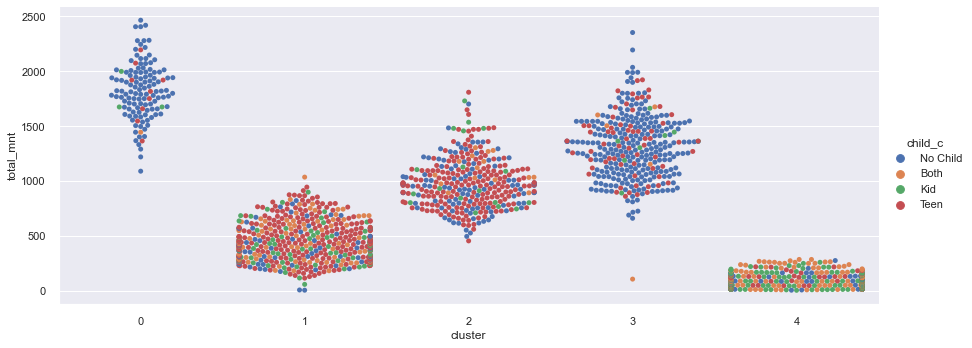

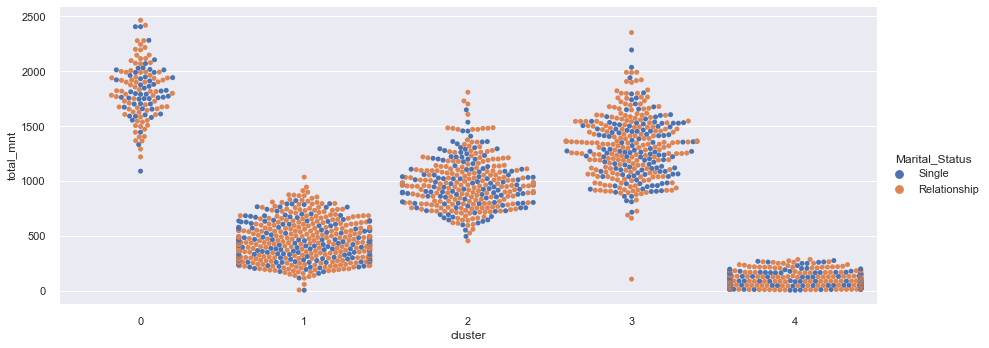

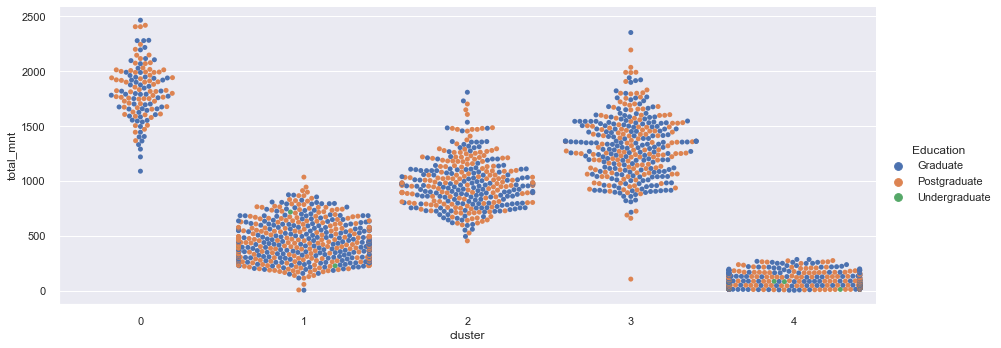

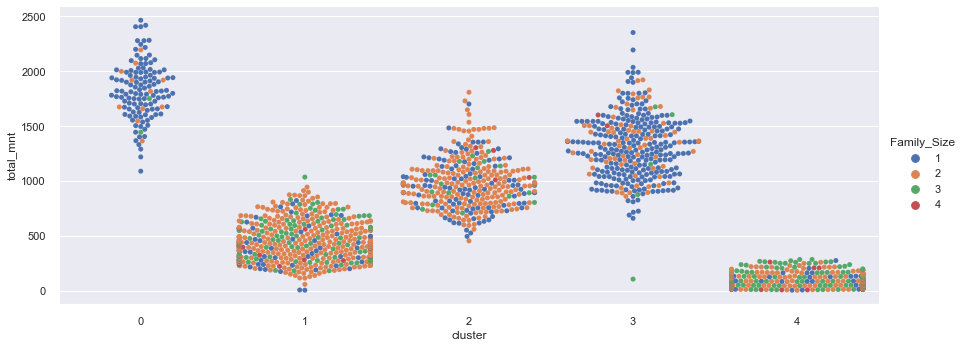

In [222]:
x_df['cluster'] = yp_km
df['cluster'] = yp_km
sns.catplot(x = 'cluster', y ='total_mnt', data=df, kind='swarm', hue = 'child_c' , height=5, aspect=500/200)
sns.catplot(x = 'cluster', y ='total_mnt', data=df, kind='swarm', hue = 'Marital_Status' , height=5, aspect=500/200)
sns.catplot(x = 'cluster', y ='total_mnt', data=df, kind='swarm', hue = 'Education' , height=5, aspect=500/200)
sns.catplot(x = 'cluster', y ='total_mnt', data=df, kind='swarm', hue = 'Family_Size' , height=5, aspect=500/200)
plt.show()

In [223]:
df['MntMeatProducts'].describe()
# 

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [231]:
To_Plot = [ "Income", "Recency", "total_mnt", "Age", "Days_from_enrol", "Family_Size","child_c"]
print("Relative Plot Of Some Selected Features: A Data Subset")
# plt.figure()
sns.pairplot(df[To_Plot],hue=df['cluster'])
#Taking hue 
plt.show()

Relative Plot Of Some Selected Features: A Data Subset


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

<AxesSubplot:xlabel='cluster', ylabel='total_mnt'>

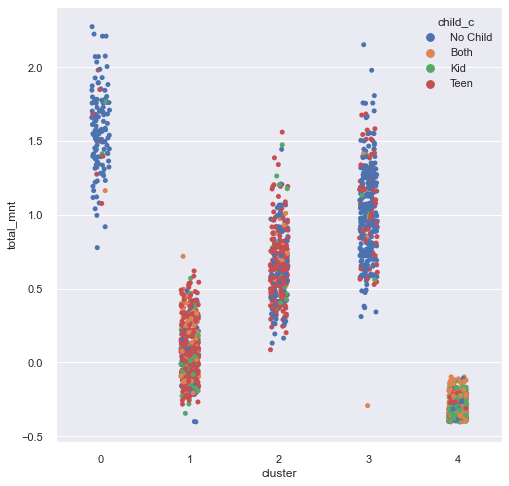

In [225]:
sns.stripplot(x="cluster", y="total_mnt", data=x_df, hue = 'child_c' )



<AxesSubplot:xlabel='cluster', ylabel='total_mnt'>

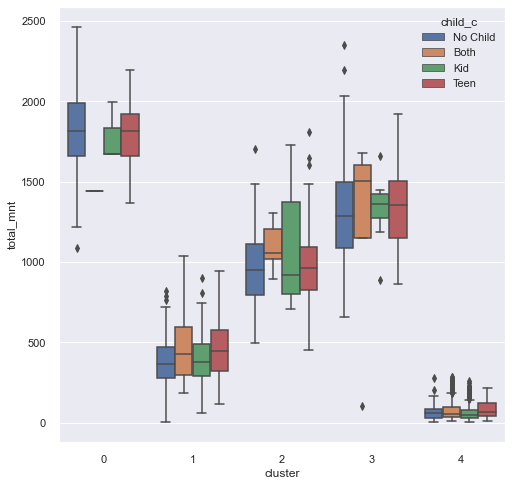

In [226]:
sns.boxplot(x="cluster", y="total_mnt", data=df, hue = 'child_c' )

In [227]:
df['NumStorePurchases']
pal = ['blue', 'orange', 'brown', 'pink', 'red', 'black']

ValueError: Could not interpret value `,NumStorePurchases` for parameter `y`

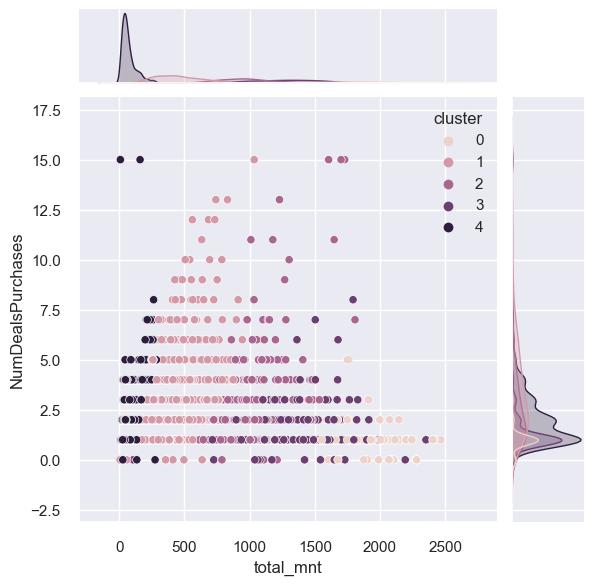

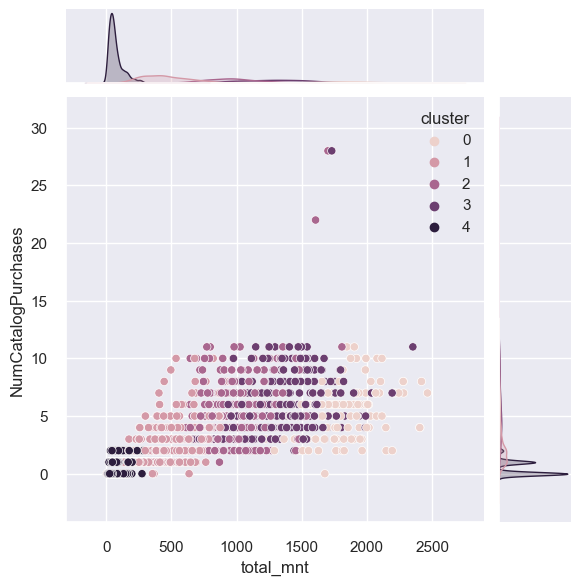

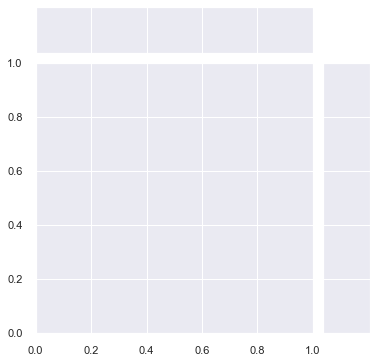

In [228]:
 y_purchaces = ['NumDealsPurchases', 'NumCatalogPurchases', ',NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth' ]
for i in y_purchaces:
    p=sns.jointplot(y=i, x="total_mnt", data=df, hue = 'cluster' )

    # plt.rcParams["figure.figsize"] = (8,8)
    p.fig.set_dpi(100)
    sns.set(rc={'figure.figsize':(50,50)})

In [ ]:
p=sns.jointplot(x='NumDealsPurchases', y="total_mnt", data=df, hue = 'cluster' , palette= pal)
p.fig.set_dpi(100)

In [ ]:
p=sns.boxplot(x='NumWebPurchases', y="total_mnt", data=df, hue = 'cluster' , palette= pal)


In [ ]:
p=sns.boxplot(x='Family_Size', y="Age", data=df, hue = 'cluster', palette= pal)


In [ ]:

ax = plt.subplot(polar=True)
ax.plot( df['cluster'], df['Family_Size'], 'o-', linewidth=2)
